In [75]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import math

### Following
- https://realpython.com/python-keras-text-classification/
- https://datascience.stackexchange.com/questions/25581/what-is-the-difference-between-countvectorizer-token-counts-and-tfidftransformer

In [76]:
df = pd.read_csv('posts_all_filtered.csv', header=None)
df.columns = ['category','content']
print(len(df.index))

711


In [77]:
df.head(2)

,category,content
0,relationships,previous post link tl dr pretty sure got direc...
1,relationships,situation worked hard rise humble beginning ge...


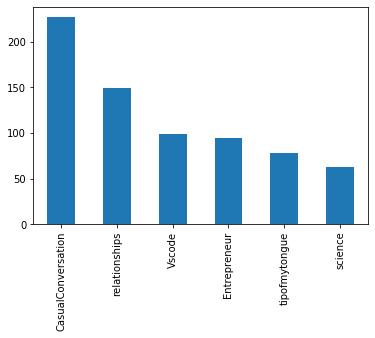

In [78]:
#balance classes
df.category.value_counts().plot(kind='bar')

In [79]:
min_category = False
categories = df.category.unique()
for category in categories:
    curr_category = len(df[df.category == category].index)
    if min_category:
        min_category = min(min_category, curr_category)
    else:
        min_category = curr_category
print(min_category)
res = []
for category in categories:
    res.append(df[df.category == category].sample(min_category))
df = pd.concat(res)
print(len(df.index))

63
378


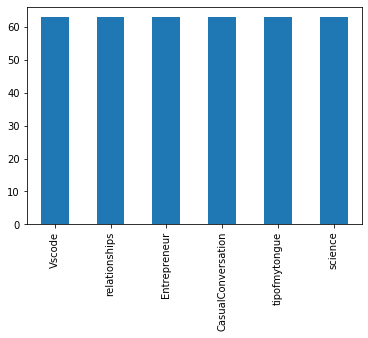

In [80]:
df.category.value_counts().plot(kind='bar')

In [81]:
train_x, valid_x, train_y, valid_y = train_test_split(df['content'], df['category'])
vectorizer = CountVectorizer()
vectorizer.fit(train_x)
train_X = vectorizer.transform(train_x)
valid_X  = vectorizer.transform(valid_x)

In [82]:
classifier = LogisticRegression()
classifier.fit(train_X, train_y)

/Users/juan/Documents/manu/dev/reddit-ml/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/juan/Documents/manu/dev/reddit-ml/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
score = classifier.score(valid_X, valid_y)
print("Accuracy:", score)

Accuracy: 0.8105263157894737


In [ ]:
#TF id


In [84]:
valid_x.head(12).reset_index()

,index,content
0,606,left old job 8 month ago regretted daily badly...
1,130,hola amigo toying around idea wanted get infor...
2,413,ha wasp stuck roof work staff bathroom month l...
3,657,much actually put resume
4,129,please use thread share accomplishment care gl...
5,328,correct understand wrong purpose setting termi...
6,297,human caused climate change ha triggered wind ...
7,59,mom pretty close realized pissing every week t...
8,161,title bit broad know exactly trying ask let sa...
9,216,played game wa young late 90 would running win...


In [85]:
valid_y.head(12).reset_index()

,index,category
0,606,CasualConversation
1,130,Entrepreneur
2,413,CasualConversation
3,657,CasualConversation
4,129,Entrepreneur
5,328,Vscode
6,297,science
7,59,relationships
8,161,Entrepreneur
9,216,tipofmytongue


In [86]:
classifier.predict(valid_X[5])

array(['Vscode'], dtype=object)